## Results of isomap on Coil-20 dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

In [2]:
def parse_image_label_coil(filename):
    f = filename.split('_')[0]
    f = f.replace('obj', '')
    return int(f)
def plot_pca_2d(principa_components, labels, title):
    """Visualize the PCA results in 2D
    Args:
        principal_components: the principal components, shape N x 2
        labels: the labels of the data, shape N x 1
        title: the title of the plot
    """
    plt.figure(figsize=(10, 10))
    plt.scatter(principa_components[:, 0], principa_components[:, 1], alpha=0.5,c=labels)
    plt.colorbar()
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.show()

images.shape: (1440, 128, 128, 3)
labels.shape: (1440,)


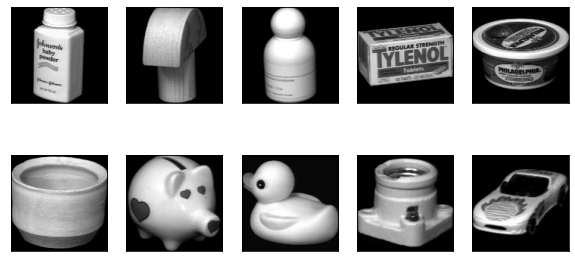

In [3]:
# import coil-20 dataset
data_path = './data/coil-20/coil-20-proc/'

images = []
labels = []

for filepath in os.listdir(data_path):
    f = os.path.join(data_path, filepath)
    img = cv2.imread(f)
    images.append(img)
    labels.append(parse_image_label_coil(filepath))

images = np.array(images)
labels = np.array(labels)
print(f"images.shape: {images.shape}")
print(f"labels.shape: {labels.shape}")
random_indices = np.random.randint(0, images.shape[0], 10)
random_images = images[random_indices]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(random_images[i], cmap='gray')
    ax.set(xticks=[], yticks=[])
plt.show()

In [ ]:
# isomap 

# flatten images
images_flat = images.reshape(images.shape[0], -1)

# isomap
iso = Isomap(n_components=2)
iso.fit(images_flat)
iso_images = iso.transform(images_flat)

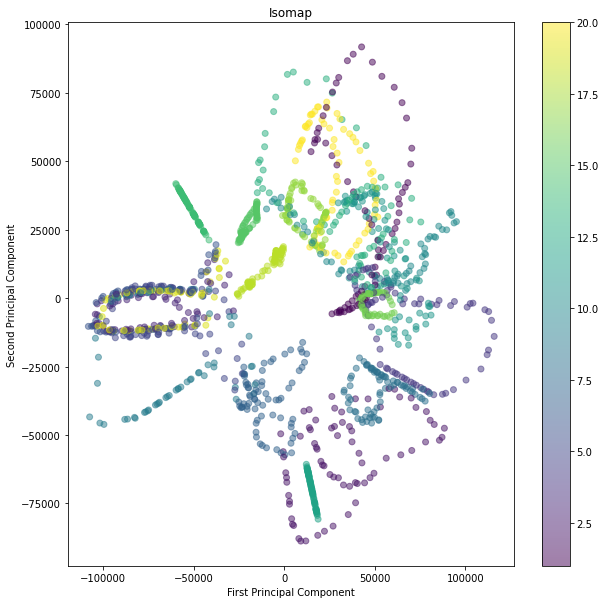

In [5]:
plot_pca_2d(iso_images, labels, 'Isomap')

## ISOMAP on the Olivetti faces dataset

In [6]:
from sklearn import datasets
olivetti = datasets.fetch_olivetti_faces()

In [ ]:
scaler = StandardScaler()
scaler.fit(olivetti.data)
olivetti.data = scaler.transform(olivetti.data)

iso = Isomap(n_components=2)
iso.fit(olivetti.data)
iso_images = iso.transform(olivetti.data)


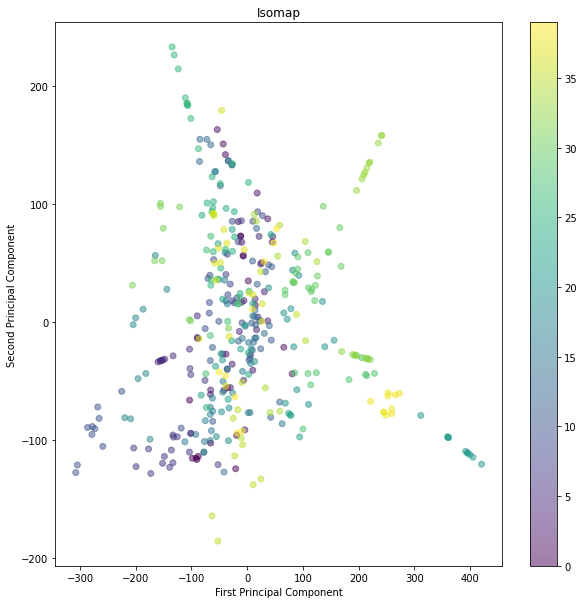

In [8]:
plot_pca_2d(iso_images, olivetti.target, 'Isomap')